# STEP #1: PROBLEM STATEMENT

# Bài toán này là một bài toán phân loại nhị phân, nhằm dự đoán trạng thái có được tuyển dụng (Placed) hay không (Not Placed) của sinh viên dựa trên các đặc trưng liên quan đến học tập, kỹ năng và hoạt động ngoại khóa.

# STEP #2: IMPORTING DATA

In [94]:
import pandas as pd   # Dùng để thao tác với dữ liệu dạng bảng (DataFrame), giúp đọc, ghi và xử lý dữ liệu hiệu quả.
import numpy as np    # xử lý số học nhanh chóng, đặc biệt là ma trận và đại số tuyến tính.
import matplotlib.pyplot as plt   # Cung cấp các công cụ vẽ biểu đồ cơ bản
import seaborn as sns   # Thư viện vẽ biểu đồ nâng cao, giúp hiển thị dữ liệu trực quan và dễ dàng hơn.
from sklearn.preprocessing import LabelEncoder    # Dùng để chuyển đổi dữ liệu phân loại (categorical) thành dạng số (numerical).
from sklearn.model_selection import train_test_split # train_test_split: Dùng để chia dữ liệu thành tập huấn luyện và kiểm tra
from sklearn.metrics import accuracy_score, classification_report #accuracy_score: Đo độ chính xác của mô hình, tính tỷ lệ dự đoán đúng trên tổng số mẫu.
                                                                  #classification_report: Hiển thị báo cáo chi tiết về mô hình, bao gồm độ chính xác (precision), độ phủ (recall), và điểm F1-score.


In [95]:
file_path = 'placementdata.csv' # Đường dẫn đến tệp CSV

In [96]:
# tải dữ liệu
df = pd.read_csv(file_path)


In [97]:
#in dữ liệu
df

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7.5,1,1,2,72,3.9,Yes,No,85,66,NotPlaced
9996,9997,7.4,0,1,0,90,4.8,No,No,84,67,Placed
9997,9998,8.4,1,3,0,70,4.8,Yes,Yes,79,81,Placed
9998,9999,8.9,0,3,2,87,4.8,Yes,Yes,71,85,Placed


# STEP #3: VISUALIZING THE DATA

In [98]:
# kiểm tra dữ liệu trống, kiểu dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [99]:
df.duplicated().sum() #Kiểm tra xem DataFrame df có bao nhiêu dòng dữ liệu bị trùng lặp.

np.int64(0)

In [100]:
# Xử lí dữ liệu

df=df.drop(columns="StudentID",axis=1) # Loại bỏ cột "StudentID" khỏi DataFrame.
label_encoder = LabelEncoder()
# Chuyển đổi các cột dạng chuỗi (object) thành số (int)
for col in ['ExtracurricularActivities', 'PlacementTraining','PlacementStatus'] :
    df[col] = label_encoder.fit_transform(df[col])


In [101]:
df

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,7.5,1,1,1,65,4.4,0,0,61,79,0
1,8.9,0,3,2,90,4.0,1,1,78,82,1
2,7.3,1,2,2,82,4.8,1,0,79,80,0
3,7.5,1,1,2,85,4.4,1,1,81,80,1
4,8.3,1,2,2,86,4.5,1,1,74,88,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,7.5,1,1,2,72,3.9,1,0,85,66,0
9996,7.4,0,1,0,90,4.8,0,0,84,67,1
9997,8.4,1,3,0,70,4.8,1,1,79,81,1
9998,8.9,0,3,2,87,4.8,1,1,71,85,1


In [102]:
df.info() # kiểm tra dữ liệu


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CGPA                       10000 non-null  float64
 1   Internships                10000 non-null  int64  
 2   Projects                   10000 non-null  int64  
 3   Workshops/Certifications   10000 non-null  int64  
 4   AptitudeTestScore          10000 non-null  int64  
 5   SoftSkillsRating           10000 non-null  float64
 6   ExtracurricularActivities  10000 non-null  int64  
 7   PlacementTraining          10000 non-null  int64  
 8   SSC_Marks                  10000 non-null  int64  
 9   HSC_Marks                  10000 non-null  int64  
 10  PlacementStatus            10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [103]:
df.describe()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,7.698010,1.049200,2.026600,1.013200,79.449900,4.323960,0.585400,0.731800,69.159400,74.501500,0.419700
std,0.640131,0.665901,0.867968,0.904272,8.159997,0.411622,0.492677,0.443044,10.430459,8.919527,0.493534
min,6.500000,0.000000,0.000000,0.000000,60.000000,3.000000,0.000000,0.000000,55.000000,57.000000,0.000000
25%,7.400000,1.000000,1.000000,0.000000,73.000000,4.000000,0.000000,0.000000,59.000000,67.000000,0.000000
50%,7.700000,1.000000,2.000000,1.000000,80.000000,4.400000,1.000000,1.000000,70.000000,73.000000,0.000000
75%,8.200000,1.000000,3.000000,2.000000,87.000000,4.700000,1.000000,1.000000,78.000000,83.000000,1.000000
max,9.100000,2.000000,3.000000,3.000000,90.000000,4.800000,1.000000,1.000000,90.000000,88.000000,1.000000


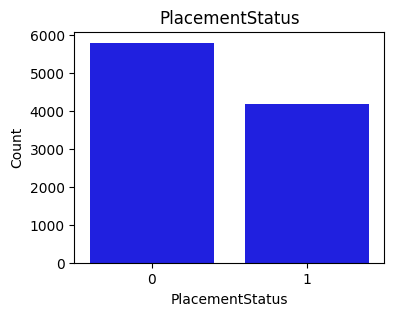

PlacementStatus
0    5803
1    4197
Name: count, dtype: int64


In [104]:
#biểu đồ giá trị PlacementStatus (được tuyển dụng 1 và không được tuyển dụng 0).

plt.figure(figsize=(4, 3)) # Thiết lập kích thước biểu đồ
sns.countplot(x="PlacementStatus", data=df, color="blue")

plt.xlabel("PlacementStatus")
plt.ylabel("Count")
plt.title("PlacementStatus")
plt.show()

counts = df["PlacementStatus"].value_counts()
print(counts)

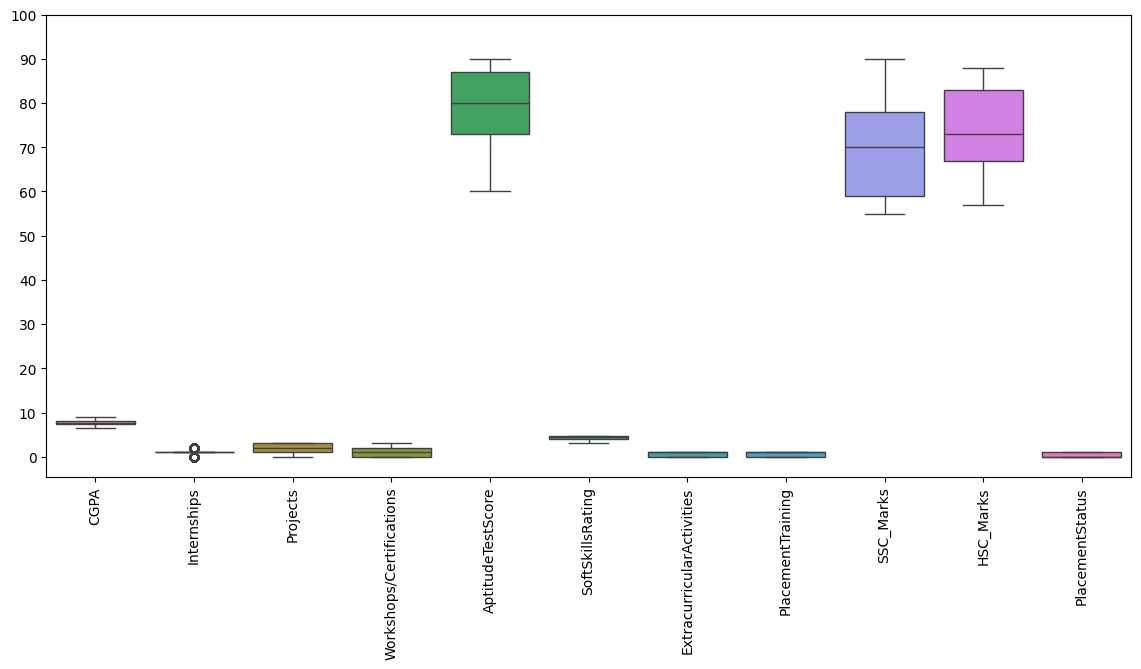

In [105]:
plt.figure(figsize=(14, 6)) # Thiết lập kích thước biểu đồ
sns.boxplot(data=df.select_dtypes(include=['number'])) # vẽ biểu đồ box-plot với các vột là int/flooat
plt.xticks(rotation=90)
plt.yticks(ticks=range(0, 101, 10))
plt.show()


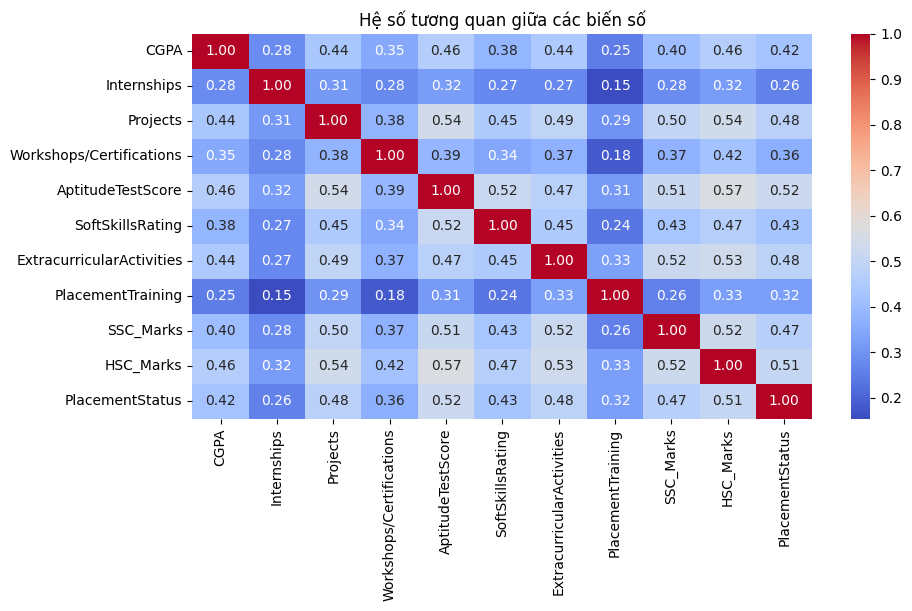

In [106]:
# Vẽ heatmap với dữ liệu đã xử lý

plt.figure(figsize=(10, 5)) # Thiết lập kích thước biểu đồ
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f') # Vẽ heatmap với giá trị hệ số tương quan
plt.title('Hệ số tương quan giữa các biến số') # Đặt tiêu đề biểu đồ
plt.show()  # Hiển thị biểu đồ

# STEP #4:MODEL TRAINING





In [107]:
# lấy taget và feature
X = df.drop(columns='PlacementStatus') # Lấy tất cả các biến độc lập , bỏ cột PlacementStatus để làm feature cho dự đoán
y = df['PlacementStatus']  # Lấy cột đích (PlacementStatus) là taget để dự đoán

In [108]:
#in ra taget
X

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks
0,7.5,1,1,1,65,4.4,0,0,61,79
1,8.9,0,3,2,90,4.0,1,1,78,82
2,7.3,1,2,2,82,4.8,1,0,79,80
3,7.5,1,1,2,85,4.4,1,1,81,80
4,8.3,1,2,2,86,4.5,1,1,74,88
...,...,...,...,...,...,...,...,...,...,...
9995,7.5,1,1,2,72,3.9,1,0,85,66
9996,7.4,0,1,0,90,4.8,0,0,84,67
9997,8.4,1,3,0,70,4.8,1,1,79,81
9998,8.9,0,3,2,87,4.8,1,1,71,85


In [109]:
#in ra label
y

0       0
1       1
2       0
3       1
4       1
       ..
9995    0
9996    1
9997    1
9998    1
9999    0
Name: PlacementStatus, Length: 10000, dtype: int64

In [110]:
# chọn tập test và train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [111]:
X_train.shape

(8000, 10)

In [112]:
y_train.shape

(8000,)

In [113]:
X_test.shape

(2000, 10)

In [114]:
y_test.shape

(2000,)

# STEP #5: EVALUATING THE MODEL(Random Forest)

In [115]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
from scipy.stats import randint 

In [116]:

# Huấn luyện mô hình cơ bản

model_rdf = RandomForestClassifier(n_estimators=300,random_state=42)
# n_estimators=100, max_depth=None, min_samples_split=2
# min_samples_leaf=1, max_features='sqrt', n_jobs=None
model_rdf.fit(X_train, y_train)
y_pred_test= model_rdf.predict(X_test)
y_pred_train = model_rdf.predict(X_train)
report_test = classification_report(y_test, y_pred_test, digits=5)
report_train = classification_report(y_train, y_pred_train, digits=5)
acc_rdf = accuracy_score(y_test, y_pred_test)
print('TEST:')
print(report_test)
print('-----------------------------------------------------')
print('TRAIN:')
print(report_train)

TEST:
              precision    recall  f1-score   support

           0    0.80400   0.82253   0.81316      1172
           1    0.74032   0.71618   0.72805       828

    accuracy                        0.77850      2000
   macro avg    0.77216   0.76935   0.77061      2000
weighted avg    0.77764   0.77850   0.77793      2000

-----------------------------------------------------
TRAIN:
              precision    recall  f1-score   support

           0    0.99978   0.99892   0.99935      4631
           1    0.99852   0.99970   0.99911      3369

    accuracy                        0.99925      8000
   macro avg    0.99915   0.99931   0.99923      8000
weighted avg    0.99925   0.99925   0.99925      8000



In [117]:
#Optimnization

param_dist = {
    'n_estimators': randint(30, 100),
    'max_depth': randint(5, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
}
random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_dist, random_state=30, n_iter=20, n_jobs=-1)
random_search.fit(X_train, y_train)
best_rf = random_search.best_estimator_
y_pred_test_reg = best_rf.predict(X_test)
y_pred_train_reg = best_rf.predict(X_train)
report_test_reg = classification_report(y_test, y_pred_test_reg, digits=5)
report_train_reg = classification_report(y_train, y_pred_train_reg, digits=5)
acc_best_rf = accuracy_score(y_test, y_pred_test_reg)
print('TEST')
print(report_test_reg)
print('-----------------------------------------------------')
print('TRAIN')
print(report_train_reg)
print(best_rf)

TEST
              precision    recall  f1-score   support

           0    0.82116   0.83447   0.82776      1172
           1    0.76020   0.74275   0.75137       828

    accuracy                        0.79650      2000
   macro avg    0.79068   0.78861   0.78957      2000
weighted avg    0.79592   0.79650   0.79614      2000

-----------------------------------------------------
TRAIN
              precision    recall  f1-score   support

           0    0.83232   0.85964   0.84576      4631
           1    0.79795   0.76195   0.77953      3369

    accuracy                        0.81850      8000
   macro avg    0.81514   0.81079   0.81265      8000
weighted avg    0.81785   0.81850   0.81787      8000

RandomForestClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=7,
                       n_estimators=65, random_state=42)


# STEP #6: EVALUATING THE MODEL(Logistic Regression)

In [118]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_test_scaler = scaler.fit_transform(X_test)
X_train_scaler = scaler.fit_transform(X_train)

In [119]:
from sklearn.linear_model import LogisticRegression
model_lgt = LogisticRegression(C=1, max_iter=1000)
model_lgt.fit(X_train_scaler, y_train)
y_pred_test= model_lgt.predict(X_test_scaler)
y_pred_train = model_lgt.predict(X_train_scaler)
report_test = classification_report(y_test, y_pred_test, digits=5)
report_train = classification_report(y_train, y_pred_train, digits=5)
acc_lgt = accuracy_score(y_test, y_pred_test)
print('TEST:')
print(report_test)
print('-----------------------------------------------------')
print('TRAIN:')
print(report_train)


TEST:
              precision    recall  f1-score   support

           0    0.83319   0.81399   0.82348      1172
           1    0.74503   0.76932   0.75698       828

    accuracy                        0.79550      2000
   macro avg    0.78911   0.79166   0.79023      2000
weighted avg    0.79669   0.79550   0.79595      2000

-----------------------------------------------------
TRAIN:
              precision    recall  f1-score   support

           0    0.82842   0.82574   0.82708      4631
           1    0.76152   0.76492   0.76322      3369

    accuracy                        0.80012      8000
   macro avg    0.79497   0.79533   0.79515      8000
weighted avg    0.80025   0.80012   0.80018      8000



In [120]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Độ phạt L2
    'penalty': ['l1', 'l2'],       # L1 hoặc L2
    'solver': ['liblinear']        # liblinear hỗ trợ cả L1 và L2
}

best_lgt = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='f1_macro')
best_lgt.fit(X_train_scaler, y_train)
y_pred_test= best_lgt.predict(X_test_scaler)
y_pred_train = best_lgt.predict(X_train_scaler)
report_test = classification_report(y_test, y_pred_test, digits=5)
report_train = classification_report(y_train, y_pred_train, digits=5)
acc_best_lgt = accuracy_score(y_test, y_pred_test)
print('TEST:')
print(report_test)
print('-----------------------------------------------------')
print('TRAIN:')
print(report_train)

TEST:
              precision    recall  f1-score   support

           0    0.83523   0.81314   0.82404      1172
           1    0.74505   0.77295   0.75874       828

    accuracy                        0.79650      2000
   macro avg    0.79014   0.79304   0.79139      2000
weighted avg    0.79790   0.79650   0.79701      2000

-----------------------------------------------------
TRAIN:
              precision    recall  f1-score   support

           0    0.82939   0.82509   0.82724      4631
           1    0.76127   0.76670   0.76398      3369

    accuracy                        0.80050      8000
   macro avg    0.79533   0.79589   0.79561      8000
weighted avg    0.80070   0.80050   0.80059      8000



# Compare 

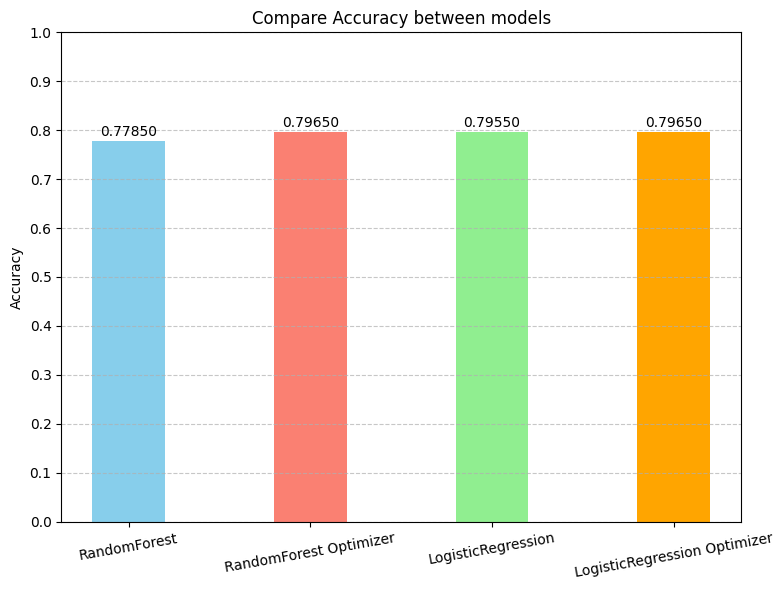

In [124]:
import matplotlib.pyplot as plt

# Dữ liệu
models = ['RandomForest', 'RandomForest Optimizer', 'LogisticRegression', 'LogisticRegression Optimizer']
accuracies = [acc_rdf, acc_best_rf, acc_lgt, acc_best_lgt]

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies,width=0.4, color=['skyblue', 'salmon', 'lightgreen', 'orange'])

# Ghi nhãn
plt.title('Compare Accuracy between models')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.0)  # Giới hạn trục y
plt.yticks([i/10 for i in range(0, 11)])  # ⚠️ Thêm dòng này để chia trục y theo bước 0.1
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.5f}', ha='center')

plt.xticks(rotation=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
